<a href="https://colab.research.google.com/github/agusrichard/data-science-projects/blob/master/Twitter%20Sentiment%20Analysis/twitter_sentiment_analysis_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Analysis: EDA

__Import Libraries__

In [1]:
# Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_palette('colorblind')

# NLTK
import nltk
from nltk.tokenize import sent_tokenize


# Ignore warning
# import warnings
# warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

__Load dataset__

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

__Helper Function__

In [4]:
def hist_count(col_name, title):
    plt.figure(figsize=(10, 7))
    for i in np.sort(train['label'].unique()):
        sns.distplot(train.loc[train['label'] == i, col_name], label=i)
    plt.title('Character Count')
    plt.legend();

---

## Introduction and Preliminary Step

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

__Motivation__

Hate  speech  is  an  unfortunately  common  occurrence  on  the  Internet.  Often social media sites like Facebook and Twitter face the problem of identifying and censoring  problematic  posts  while weighing the right to freedom of speech. The  importance  of  detecting  and  moderating hate  speech  is  evident  from  the  strong  connection between hate speech and actual hate crimes. Early identification of users promoting  hate  speech  could  enable  outreach  programs that attempt to prevent an escalation from speech to action. Sites such as Twitter and Facebook have been seeking  to  actively  combat  hate  speech. In spite of these reasons, NLP research on hate speech has been very limited, primarily due to the lack of a general definition of hate speech, an analysis of its demographic influences, and an investigation of the most effective features.

First, we check whether the dataset contains missing values or not.

In [5]:
print('Does train set have missing values? ')
print(train.isnull().any(), '\n')
print('Does test set have missing values? ')
print(test.isnull().any(), '\n')

Does train set have missing values? 
id       False
label    False
tweet    False
dtype: bool 

Does test set have missing values? 
id       False
tweet    False
dtype: bool 



Check the data type for each column.

In [6]:
print('Train set data types: ')
print(train.dtypes, '\n')
print('Test set data types: ')
print(test.dtypes, '\n')

Train set data types: 
id        int64
label     int64
tweet    object
dtype: object 

Test set data types: 
id        int64
tweet    object
dtype: object 



Do we have imbalance dataset?

In [7]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

So we have an imbalance dataset since 29,720 data points are label 0 (does not contain hate speech) and 2,242 data points are label 1 (contains hate speech). Therefore, accuracy won't be a good metric of choice, f-1 score or ROC AUC Score probably are better options. Let's focus on those two and set f-1 score to be the primary metric.

---

## Exploratory Data Analysis

Counting the number of characters within each data point.

In [8]:
train['char_count'] = train['tweet'].str.len()
train[['tweet', 'char_count']].head()

,tweet,char_count
0,@user when a father is dysfunctional and is s...,102
1,@user @user thanks for #lyft credit i can't us...,122
2,bihday your majesty,21
3,#model i love u take with u all the time in ...,86
4,factsguide: society now #motivation,39


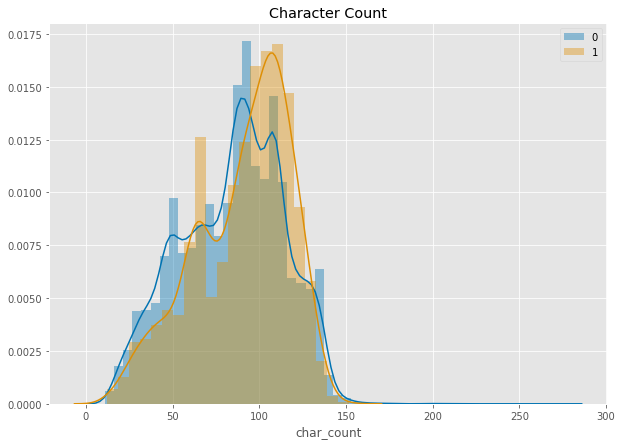

In [9]:
hist_count('char_count', 'Character Count')

Negative tweet tends to slightly have more characters.

In [10]:
train['word_count'] = train['tweet'].apply(lambda x: len(x.split()))
train[['tweet', 'word_count']].head()

,tweet,word_count
0,@user when a father is dysfunctional and is s...,18
1,@user @user thanks for #lyft credit i can't us...,19
2,bihday your majesty,3
3,#model i love u take with u all the time in ...,14
4,factsguide: society now #motivation,4


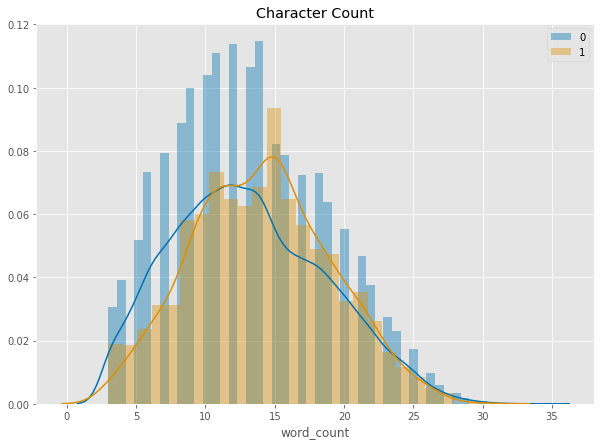

In [11]:
hist_count('word_count', 'Word Count')

In [12]:
# note that white spaces are included with this calculation
train['avg_word'] = train['char_count'] / train['word_count']
train[['tweet', 'avg_word']].head()

,tweet,avg_word
0,@user when a father is dysfunctional and is s...,5.666667
1,@user @user thanks for #lyft credit i can't us...,6.421053
2,bihday your majesty,7.000000
3,#model i love u take with u all the time in ...,6.142857
4,factsguide: society now #motivation,9.750000


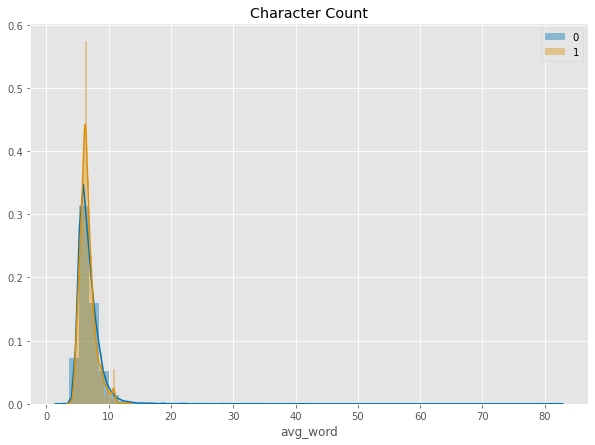

In [13]:
hist_count('avg_word', 'Average Word')

In [14]:
# note that white spaces are included with this calculation
train['hashtags_mentions_count'] = train['tweet'].apply(lambda x: len([word for word in x.split() if word.startswith('@') or word.startswith('#')]))
train[['tweet', 'hashtags_mentions_count']].head()

,tweet,hashtags_mentions_count
0,@user when a father is dysfunctional and is s...,2
1,@user @user thanks for #lyft credit i can't us...,5
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,1
4,factsguide: society now #motivation,1


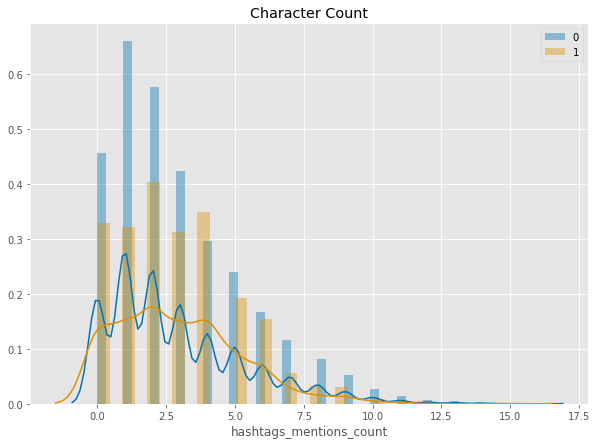

In [15]:
hist_count('hashtags_mentions_count', 'Hastags and Mentions Count')

In [16]:
# note that white spaces are included with this calculation
train['sentence_count'] = train['tweet'].apply(lambda x: len(sent_tokenize(x)))
train[['tweet', 'sentence_count']].head()

,tweet,sentence_count
0,@user when a father is dysfunctional and is s...,2
1,@user @user thanks for #lyft credit i can't us...,2
2,bihday your majesty,1
3,#model i love u take with u all the time in ...,2
4,factsguide: society now #motivation,1


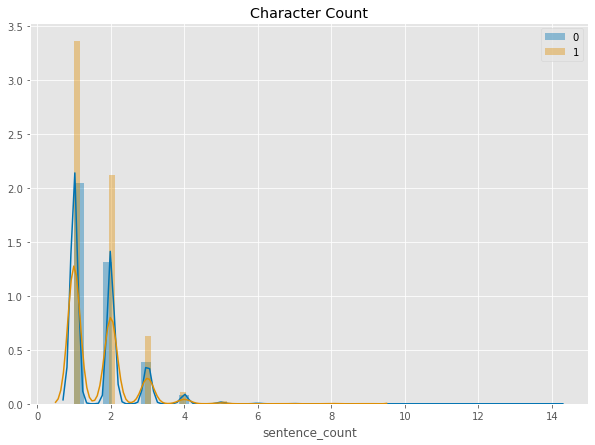

In [17]:
hist_count('sentence_count', 'Sentence Count')

In [20]:
num_cols = ['char_count', 'word_count', 'avg_word', 'hashtags_mentions_count', 'sentence_count']
train[num_cols].describe()

,char_count,word_count,avg_word,hashtags_mentions_count,sentence_count
count,31962.000000,31962.00000,31962.000000,31962.000000,31962.000000
mean,84.739628,13.15872,6.778732,2.892998,1.632564
std,29.455749,5.47815,1.990603,2.483222,0.823166
min,11.000000,3.00000,2.000000,0.000000,1.000000
25%,63.000000,9.00000,5.666667,1.000000,1.000000
50%,88.000000,13.00000,6.363636,2.000000,1.000000
75%,108.000000,17.00000,7.428571,4.000000,2.000000
max,274.000000,34.00000,82.333333,16.000000,14.000000


In [26]:
train.groupby('label')[['char_count', 'word_count', 'avg_word', 'hashtags_mentions_count', 'sentence_count']].agg(['mean', 'std', 'min', 'max'])

char_count                      ... sentence_count                  
            mean        std min  max  ...           mean       std min max
label                                 ...                                 
0      84.328634  29.566484  11  274  ...       1.633513  0.823954   1  14
1      90.187779  27.375502  12  152  ...       1.619982  0.812724   1   9

[2 rows x 20 columns]